# Simulación de anomalías gravitacionales

Autor: Julio César Fernández Kolmer

# Práctica de gravimetría - Física de la Tierra
 
 El archivo `gravity_profile.dat` contiene mediciones de distancia horizontal (1ª columna), topografía (2ª columna) y gravedad (3ª columna) a lo largo de un perfil cerca de Manzanares el Real (latitud: 40.72627° N, longitud: -3.86265° W). 
 El perfil atraviesa una intrusión de gabro (densidad = 3100 kg/m³) con una geometría aproximadamente esférica. 
 La densidad media de la corteza a lo largo del perfil es de 2670 kg/m³.

1. Representar los datos de gravedad y topografía a lo largo del perfil
Cargar y representar los datos


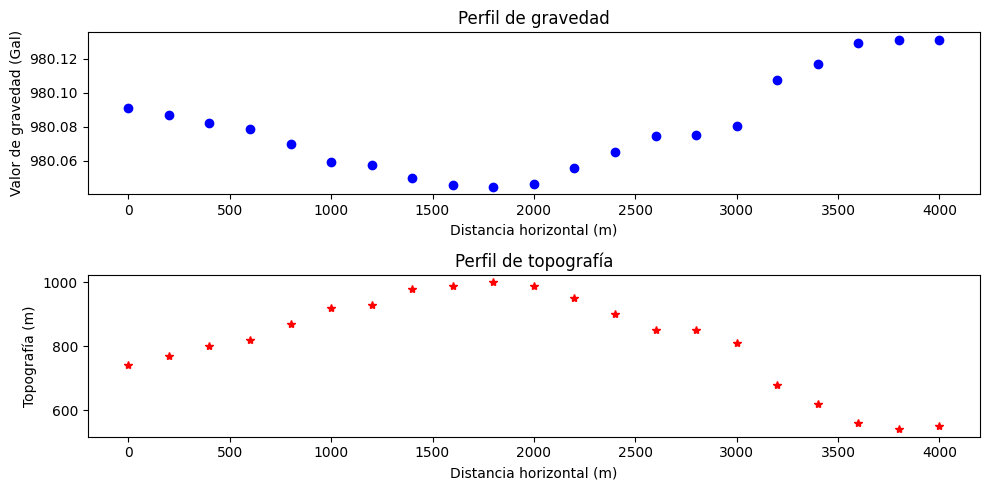

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#Cargando los archivos de gravity_profile.dat y añadiendo g * 1.5e-6 * (2 * np.random.rand(len(x)) - 1) hemos generado gravity_profile_random.dat
#data = np.loadtxt("gravity_profile.dat")

#x = data[:21, 0]
#h = data[:21, 1]
#g = data[:21, 2]  # Datos en gales

# Introducir ruido aleatorio
#np.random.seed(42)
#g = g + g * 1.5e-6 * (2 * np.random.rand(len(x)) - 1)



# Cargar datos con ruido
data_random = np.loadtxt("gravity_profile_random.dat")

x = data_random[:21, 0]
h = data_random[:21, 1]
g = data_random[:21, 2]

# Representar gravedad y topografía
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(x, g, 'bo')
plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Valor de gravedad (Gal)')
plt.title('Perfil de gravedad')

plt.subplot(2, 1, 2)
plt.plot(x, h, 'r*')
plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Topografía (m)')
plt.title('Perfil de topografía')

plt.tight_layout()
plt.show()

# 2. Calcular y representar las anomalías de aire libre y de Bouguer simple

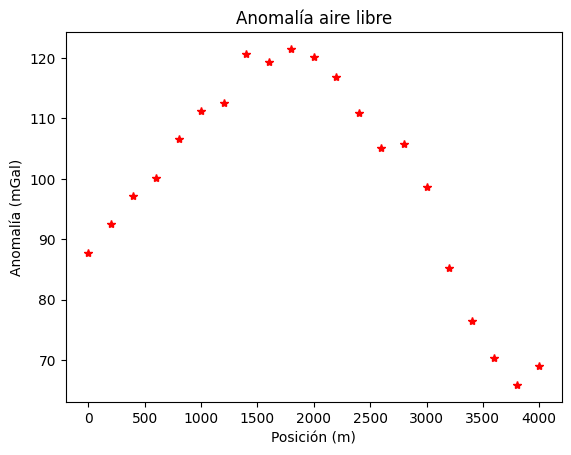

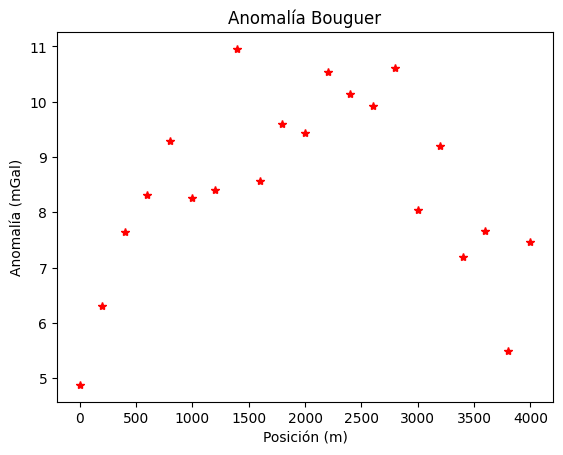

In [22]:
# Corrección aire libre
phi = 40.726  # Latitud en grados
g_elipsoide = 9.7803 * (1 + (5.30244e-3) * (np.sin(np.radians(phi))**2) - (5.8e-6 * (np.sin(2 * np.radians(phi))**2)))
g_elipsoide_mg = g_elipsoide * 1e5

deltaG_air_free = g * 1e3 + 0.3086 * h - g_elipsoide_mg

plt.figure()
plt.plot(x, deltaG_air_free, '*r')
plt.title('Anomalía aire libre')
plt.xlabel('Posición (m)')
plt.ylabel('Anomalía (mGal)')
plt.show()

# Corrección Bouguer
deltaG_bouguer = g * 1e3 + 0.3086 * h - 0.1119 * h - g_elipsoide_mg

plt.figure()
plt.plot(x, deltaG_bouguer, '*r')
plt.title('Anomalía Bouguer')
plt.xlabel('Posición (m)')
plt.ylabel('Anomalía (mGal)')
plt.show()


### 3. Estimación del radio y profundidad

Suponiendo que el centro de la esfera se encuentra en la mitad del perfil, estimar su radio \( R \) y profundidad \( z \) a partir de la semianchura de la anomalía de gravedad máxima, según las siguientes expresiones:

$$
\Delta g_{sp}(x,z) = \Delta g_{max} \frac{1}{{(1+(x/z)^2)}^{3/2}}
$$

$$
\Delta g_{max} = \frac{4\pi G \rho R^3}{3z^2}
$$

$$
x_{1/2} = \sqrt{2^{2/3}-1} \cdot z
$$

Representar los datos de anomalía de gravedad de Bouguer de entrada y la anomalía de gravedad predicha de la esfera para los valores estimados de radio y profundidad.

---



Media de la anomalía de Bouguer: 8.471655216345209
Puntos de corte con la media: [3271.54806388  846.55035203]
Anchura media de la curva(m): 2424.9977118561765


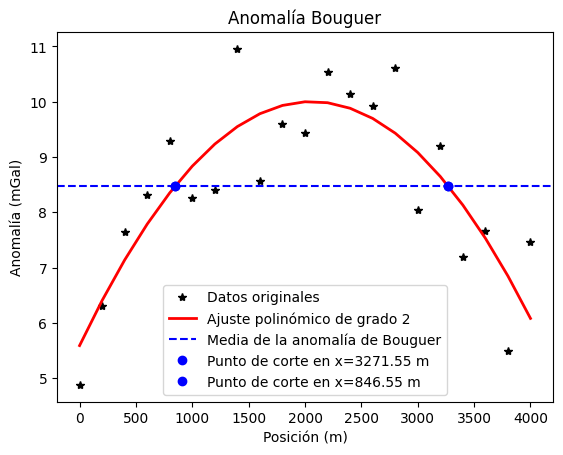

In [23]:
# Media de la anomalía
media_datos_anomalia = np.mean(deltaG_bouguer)
print("Media de la anomalía de Bouguer:", media_datos_anomalia)

#Ajuste inicial de los datos:
grado = 2
coeficientes = np.polyfit(x, deltaG_bouguer, grado)
#print(coeficientes)
# Generar el polinomio ajustado
polinomio = np.poly1d(coeficientes)
y_ajustado = polinomio(x)

#Hallar la anchura media de nuestra curva

# Hallar los cortes entre la media y el ajuste
# Restamos la media de la anomalía al polinomio
polinomio_residual = polinomio - media_datos_anomalia

# Encontramos las raíces de esta función (puntos de corte)
cortes = np.roots(polinomio_residual)
print("Puntos de corte con la media:", cortes)
anchura_media = cortes[0] - cortes[1]
print("Anchura media de la curva(m):", anchura_media)


plt.figure()
plt.plot(x, deltaG_bouguer, '*k', label='Datos originales')
plt.plot(x, y_ajustado, label=f'Ajuste polinómico de grado {grado}', color='red', linewidth=2)
plt.axhline(y=media_datos_anomalia, color='b', linestyle='--', label='Media de la anomalía de Bouguer')
# Mostrar los cortes en el gráfico
for corte in cortes:
    if min(x) <= corte <= max(x):  # Asegurarse de que el corte esté dentro del rango de x
        plt.plot(corte, media_datos_anomalia, 'bo')  # Marcamos los puntos de corte
        plt.plot(corte, media_datos_anomalia, 'bo', label=f'Punto de corte en x={corte:.2f} m')



plt.title('Anomalía Bouguer')
plt.xlabel('Posición (m)')
plt.ylabel('Anomalía (mGal)')
plt.legend()
plt.show()


Una vez hemos calculado la anchura media calculamos la z, la profundidad de la esfera con la ecuación:

$$
x_{1/2} = \sqrt{2^{2/3}-1} \cdot z
$$

$$
z = \frac{x_{1/2}}{\sqrt{2^{2/3}-1}}
$$

In [24]:
z = anchura_media/np.sqrt(2**(2/3) - 1)
print("profundidad de la esfera:", z, "m")

profundidad de la esfera: 3164.0546287801344 m


Ahora hayamos el radio de la esfera con la siguiente ecuación:
$$
\Delta g_{max} = \frac{4\pi G \rho R^3}{3z^2}
$$

$$
R = \left[ \frac{3z^2 \cdot \Delta g_{max}}{4 \pi G \rho} \right] ^\frac{1}{3}
$$

In [28]:
anomalia_maxima = max(deltaG_bouguer)
print(anomalia_maxima)
anomalia_maxima_SI = anomalia_maxima*1e-8
R = ((3*z**2*anomalia_maxima_SI)/(4*np.pi*6.67e-11*3100))**(1/3)
print("El radio de la esfera de la anomalía en metros:", R)

10.95460759731941
El radio de la esfera de la anomalía en metros: 108.18562164023082


Ahora podemos representar la anomalía teórica generada por esta distribución de masa:

$$
\Delta g_{sp}(x,z) = \Delta g_{max} \frac{1}{{(1+(x/z)^2)}^{3/2}}
$$

Esta 'x' es la posición relativa a la esfera que genera la anomalía, por tanto para poder representar los datos teóricos de la anomalía sobre las coordenadas reales, debemos calcular la posición 'x' de la anomalía, que corresponde al punto medio de la anchura media en nuestro ajuste inicial.

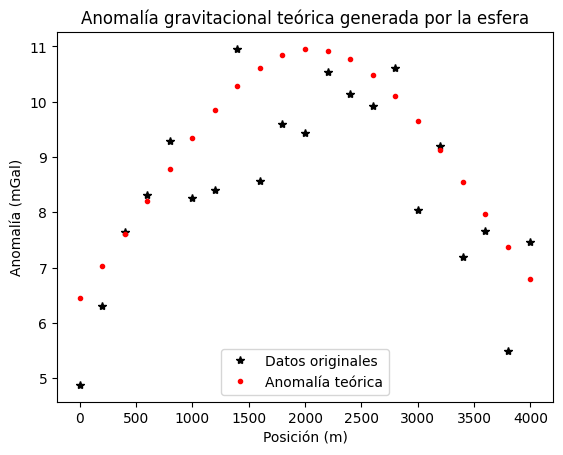

In [33]:
posicion_central_anomalia = (cortes[1] + cortes[0])/2

array_anomalia_teorica = anomalia_maxima/(1 + ((x-posicion_central_anomalia)/z)**2)**(3/2)
array2 = 1e8*(4 * np.pi * 6.67430e-11 * 3100 * R**3) /(3 * z**2) /(1 + ((x-posicion_central_anomalia)/z)**2)**(3/2)

#print(array_anomalia_teorica)
#print(1e8*(4 * np.pi * 6.67430e-11 * 3100 * R**3) /(3 * z**2))
#Ahora representamos los datos en una grafica junto con los datos de la anomalia de Bouguer
plt.figure()
plt.plot(x, deltaG_bouguer, '*k', label='Datos originales')
plt.plot(x, array_anomalia_teorica, '.r', label='Anomalía teórica')
#plt.plot(x, array2, '.b', label='Anomalía 2')

plt.title('Anomalía gravitacional teórica generada por la esfera')
plt.xlabel('Posición (m)')
plt.ylabel('Anomalía (mGal)')
plt.legend()
plt.show()


Podemos comprobar que los resultados teóricos se ajustan muy bien a las anomalías experimentales.



### 4. Estimación de la incertidumbre

Considerar intervalos del ±50% para el radio \( R \) y la profundidad \( z \) obtenidos en la sección anterior. Calcular el error de ajuste (*misfit*) para todas las combinaciones posibles de \( R \) y \( z \), tomando 100 puntos para cada intervalo.

$$
\text{misfit} = \frac{\sum{(\Delta g_{sp} - \Delta g_{\text{Boug}})^2}}{n-1}
$$

Representar el error de ajuste en función de \( R \) y \( z \).

Encontrar el error de ajuste (*misfit*) mínimo y los valores de \( R \) y \( z \) asociados. Representar los valores de \( R \) y \( z \) dentro de los intervalos cuyo *misfit* sea menor al 10% del valor mínimo de *misfit*. Representar también los valores de \( R \) y \( z \) para el modelo de *misfit* mínimo y para el modelo estimado en la sección 3 a partir de la semianchura de la anomalía de gravedad.

Representar los datos de anomalía de gravedad de Bouguer de entrada y la anomalía de gravedad predicha de la esfera para:

1. El modelo de *misfit* mínimo dentro de los intervalos.
2. El modelo estimado en la sección 3 a partir de la semianchura de la anomalía de gravedad.


[ 4.8766076  6.3076076  7.6486076  8.3126076  9.2876076  8.2626076
  8.3996076 10.9546076  8.5716076  9.5886076  9.4316076 10.5436076
 10.1386076  9.9236076 10.6136076  8.0456076  9.2046076  7.1826076
  7.6606076  5.4866076  7.4636076]


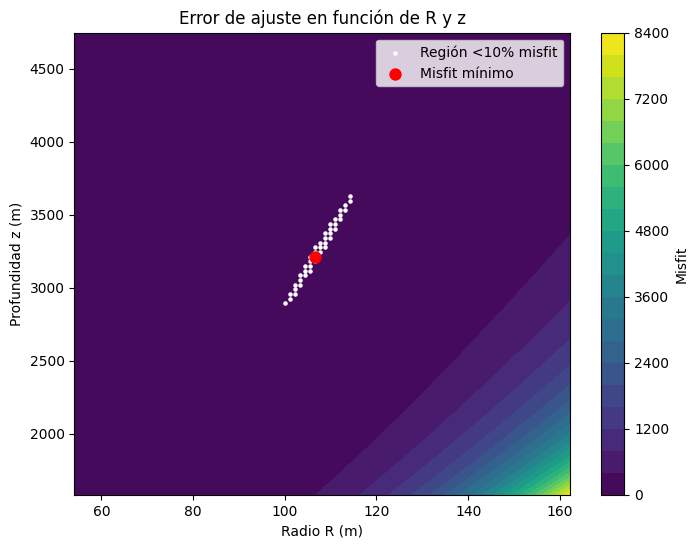

[   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200.
 2400. 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000.] 108.18562164023082 3164.0546287801344


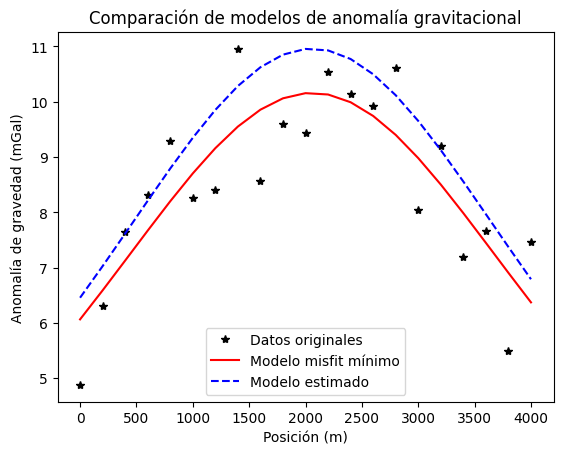

In [40]:
# Definir el modelo de anomalía gravitacional de una esfera

#Tenemos en cuenta que la anomalia_maxima varia en funcion del radio: $$\Delta g_{max} = \frac{4\pi G \rho R^3}{3z^2}

def gravedad_esfera(x, R, z):
    return 1e8*(4 * np.pi * 6.67430e-11 * 3100 * R**3) /(3 * z**2) /(1 + ((x-posicion_central_anomalia)/z)**2)**(3/2)
# Intervalos de R y z
R_estimado = R
z_estimado = z

R_vals = np.linspace(0.5 * R_estimado, 1.5 * R_estimado, 100)
z_vals = np.linspace(0.5 * z_estimado, 1.5 * z_estimado, 100)

# Crear malla de combinaciones (R, z)
misfit_matrix = np.zeros((len(R_vals), len(z_vals)))

# Datos experimentales
print(deltaG_bouguer)
x_c = posicion_central_anomalia  # Centro estimado de la anomalía

# Calcular el misfit para cada combinación de R y z
for i, R_valor in enumerate(R_vals):
    for j, z_valor in enumerate(z_vals):
        deltaG_sp = gravedad_esfera(x, R_valor, z_valor)
        misfit_matrix[i, j] = np.sum((deltaG_sp - deltaG_bouguer) ** 2) / (len(x) - 1)

# Encontrar el mínimo misfit y sus parámetros
min_misfit_idx = np.unravel_index(np.argmin(misfit_matrix), misfit_matrix.shape)
R_min = R_vals[min_misfit_idx[0]]
z_min = z_vals[min_misfit_idx[1]]
min_misfit = misfit_matrix[min_misfit_idx]

# Filtrar valores con misfit < 10% del mínimo
threshold = 1.1 * min_misfit
valid_idx = np.where(misfit_matrix < threshold)

# Representar el mapa de misfit
plt.figure(figsize=(8, 6))
plt.contourf(R_vals, z_vals, misfit_matrix.T, levels=20, cmap='viridis')
plt.colorbar(label="Misfit")
plt.scatter(R_vals[valid_idx[0]], z_vals[valid_idx[1]], color='white', s=5, label='Región <10% misfit')
plt.scatter(R_min, z_min, color='red', label='Misfit mínimo', marker='.', s=250)
plt.xlabel("Radio R (m)")
plt.ylabel("Profundidad z (m)")
plt.title("Error de ajuste en función de R y z")
plt.legend()
plt.show()

# Comparación de modelos
deltaG_teorico_min = gravedad_esfera(x, R_min, z_min)
deltaG_teorico_estimado = gravedad_esfera(x, R_estimado, z_estimado)
print(x, R_estimado, z_estimado)
plt.figure()
plt.plot(x, deltaG_bouguer, '*k', label="Datos originales")
plt.plot(x, deltaG_teorico_min, '-r', label="Modelo misfit mínimo")
plt.plot(x, deltaG_teorico_estimado, '--b', label="Modelo estimado")

plt.xlabel("Posición (m)")
plt.ylabel("Anomalía de gravedad (mGal)")
plt.legend()
plt.title("Comparación de modelos de anomalía gravitacional")
plt.show()
